## Kaulos RNN Tests
These tests require the keras master branch.

In [1]:
from kaulos import *
    
M = 4
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

component_1 = LeakyIAF()
component_2 = LeakyIAF()
cell = KaulosWrapperCell([component_1, component_2])
x = keras.Input(x_train.shape[1:])
layer = RNN(cell, return_sequences = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train)
end = time.time()
print(end - start)

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


Units: 4
State Size: 4
Unit Size per Layer: [2, 2]
State Size per Layer: [[2], [2]]
[0, 0]
[0, 1]
[]
('V', 0)
('s', 1)
('I', 0)
V: Elemwise{sub,no_inplace}.0
('V', 0, Subtensor{::, int64:int64:}.0)
('s', 1, Subtensor{::, int64:int64:}.0)
[2, 3]
[]
('V', 0)
('s', 1)
('I', 0)
V: Elemwise{sub,no_inplace}.0
('V', 0, Subtensor{::, int64:int64:}.0)
('s', 1, Subtensor{::, int64:int64:}.0)
[[IncSubtensor{Set;::, int64:int64:}.0], [IncSubtensor{Set;::, int64:int64:}.0]]
Input Tensor: <TensorType(float32, matrix)>
Input State Tensor: (<TensorType(float32, matrix)>,)
Output Tensor: Join.0
Output State Tensor: [Join.0, [IncSubtensor{Set;::, int64:int64:}.0], [IncSubtensor{Set;::, int64:int64:}.0]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100L, 4L)          0         
_________________________________________________________________
rnn_1 (RNN)                  (None, 100L,

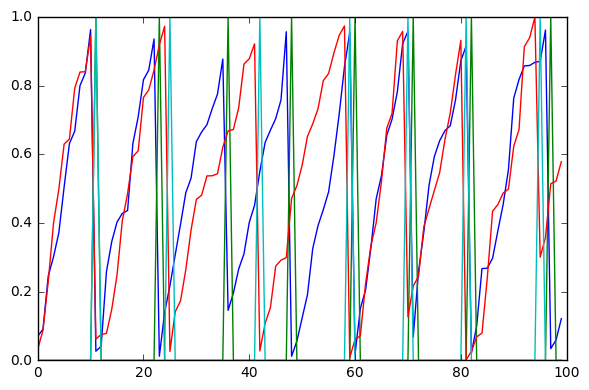

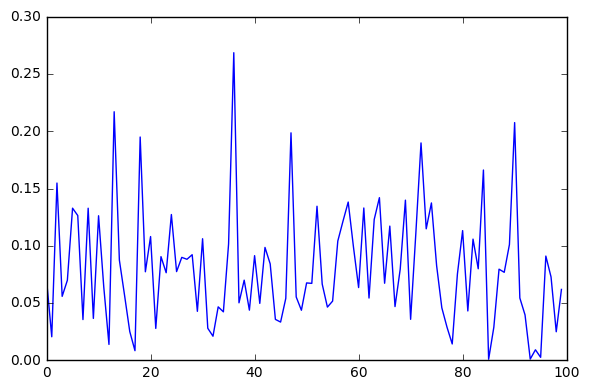

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_output[0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

## Component Level Tests
The following are the component level tests for various Kaulos components.

In [1]:
from kaulos import *
    
M = 2
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

component = LeakyIAF()
cell = KaulosWrapperCell([component])
x = keras.Input(x_train.shape[1:])
layer = RNN(cell, return_sequences = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train)
end = time.time()
print(end - start)

'''
import time
start = time.time()
model_output = model.train_on_batch(x_train, x_train)
end = time.time()
print(end - start)
'''


Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


Units: 2
State Size: 2
Unit Size per Layer: [2]
State Size per Layer: [[2]]
[0]
[0, 1]
[]
('V', 0)
('s', 1)
('I', 0)
V: Elemwise{sub,no_inplace}.0
('V', 0, Subtensor{::, int64:int64:}.0)
('s', 1, Subtensor{::, int64:int64:}.0)
[[IncSubtensor{Set;::, int64:int64:}.0]]
Input Tensor: <TensorType(float32, matrix)>
Input State Tensor: (<TensorType(float32, matrix)>,)
Output Tensor: Subtensor{::, int64:int64:}.0
Output State Tensor: [Subtensor{::, int64:int64:}.0, [IncSubtensor{Set;::, int64:int64:}.0]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100L, 2L)          0         
_________________________________________________________________
rnn_1 (RNN)                  (None, 100L, 2)           0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
7.28200006485


'\nimport time\nstart = time.time()\nmodel_output = model.train_on_batch(x_train, x_train)\nend = time.time()\nprint(end - start)\n'

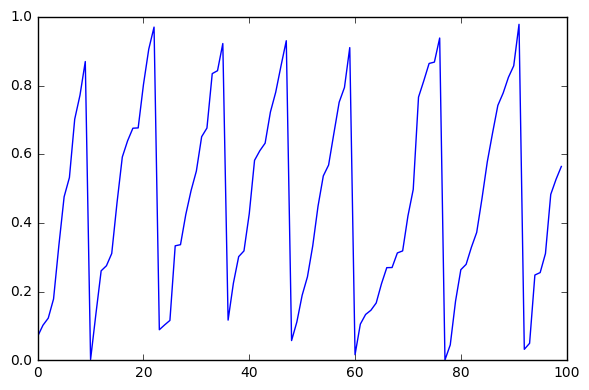

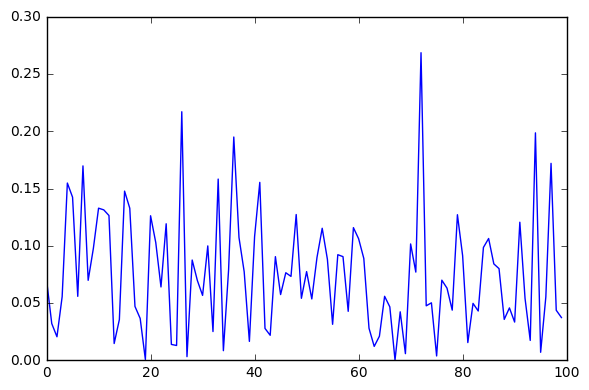

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_output[0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [3]:
from kaulos import *
    
M = 2
T = 100000
x_train = np.abs(np.random.randn(1,T,M)) * 0. + 10.0

component = HodgkinHuxley()
cell = KaulosWrapperCell([component])
x = keras.Input(x_train.shape[1:])
layer = RNN(cell, return_sequences = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train)
end = time.time()
print(end - start)

'''
import time
start = time.time()
model_output = model.train_on_batch(x_train, x_train)
end = time.time()
print(end - start)
'''


Units: 2
State Size: [2, 3]
Unit Size per Layer: [2]
State Size per Layer: [[2, 3]]
[3]
[0, 1]
[0, 1, 2]
('V', 0)
('s', 1)
('n', 0)
('m', 1)
('h', 2)
('I', 0)
('V', 0, Subtensor{::, int64:int64:}.0)
('s', 1, Subtensor{::, int64:int64:}.0)
('n', 0)
('m', 1)
('h', 2)
[[IncSubtensor{Set;::, int64:int64:}.0, IncSubtensor{Set;::, int64:int64:}.0]]
Input Tensor: <TensorType(float32, matrix)>
Input State Tensor: (<TensorType(float32, matrix)>, <TensorType(float32, matrix)>)
Output Tensor: IncSubtensor{Set;::, int64:int64:}.0
Output State Tensor: [IncSubtensor{Set;::, int64:int64:}.0, [IncSubtensor{Set;::, int64:int64:}.0, IncSubtensor{Set;::, int64:int64:}.0]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100000L, 2L)       0         
_________________________________________________________________
rnn_2 (RNN)                  (None, 100000L, 2)        0         
Total pa

'\nimport time\nstart = time.time()\nmodel_output = model.train_on_batch(x_train, x_train)\nend = time.time()\nprint(end - start)\n'

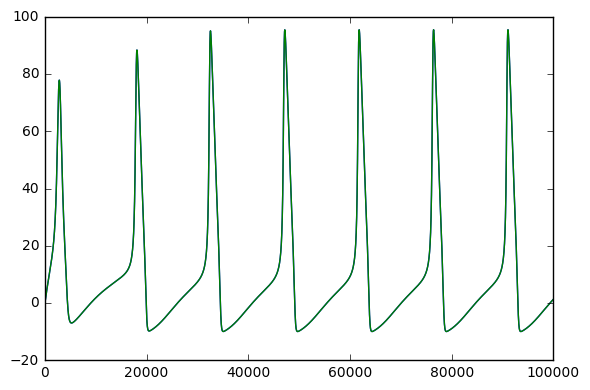

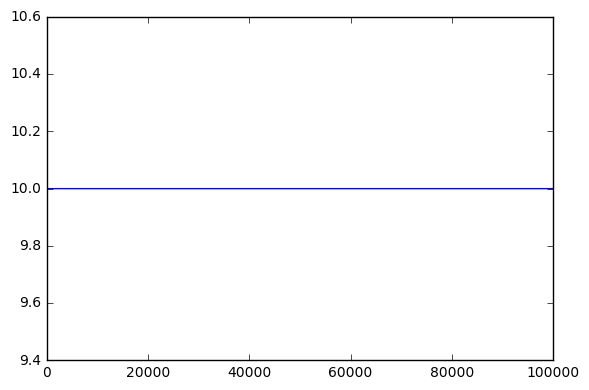

In [4]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_output[0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [3]:
from kaulos import *
    
M = 4
T = 1000
x_train = np.greater(np.abs(np.random.randn(1,T,M)), 2.75) * 0.1

component = AlphaSynapse()
cell = KaulosWrapperCell([component])
x = keras.Input(x_train.shape[1:])
layer = RNN(cell, return_sequences = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train)
end = time.time()
print(end - start)

'''
import time
start = time.time()
model_output = model.train_on_batch(x_train, x_train)
end = time.time()
print(end - start)
'''


Units: 2
State Size: [2, 3]
Unit Size per Layer: [2]
State Size per Layer: [[2, 3]]
[3]
[0, 1]
[0, 1, 2]
('g', 0)
('gm', 1)
('a_0', 0)
('a_1', 1)
('a_2', 2)
('spike_state', 0)
('g', 0, Subtensor{::, int64:int64:}.0)
('gm', 1, Subtensor{::, int64:int64:}.0)
('a_0', 0)
('a_1', 1)
('a_2', 2)
[[IncSubtensor{Set;::, int64:int64:}.0, IncSubtensor{Set;::, int64:int64:}.0]]
Input Tensor: <TensorType(float32, matrix)>
Input State Tensor: (<TensorType(float32, matrix)>, <TensorType(float32, matrix)>)
Output Tensor: IncSubtensor{Set;::, int64:int64:}.0
Output State Tensor: [IncSubtensor{Set;::, int64:int64:}.0, [IncSubtensor{Set;::, int64:int64:}.0, IncSubtensor{Set;::, int64:int64:}.0]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1000L, 4L)         0         
_________________________________________________________________
rnn_2 (RNN)                  (None, 1000L, 2)     

'\nimport time\nstart = time.time()\nmodel_output = model.train_on_batch(x_train, x_train)\nend = time.time()\nprint(end - start)\n'

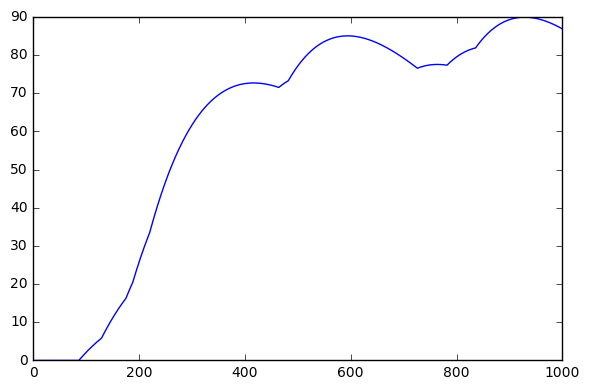

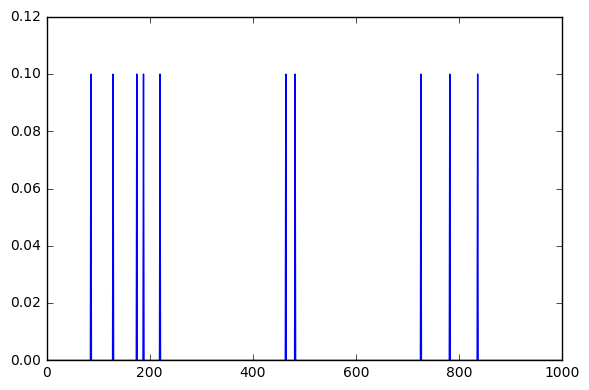

In [4]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_output[0][:,0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()